#Matplotlib

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mudy_data_complete = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
mudy_data_complete.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [44]:
#Part 1
#Checking the number of mice.
number_mice= mudy_data_complete["Mouse ID"].nunique()
number_mice=249
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]=="g989", :]
# Optional: Get all the data for the duplicate mouse ID. 
print(dup_mouse)
dupli_mous_ID = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]=="g989", :]
dupli_mous_ID
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mudy_comp_clean_df = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]!="g989", :]
mudy_comp_clean_df
# Checking the number of mice in the clean DataFrame.
mudy_comp_clean_df["Mouse ID"].nunique()

#part 2

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


#mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#mudy_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#summary_df= #assinging these values to new columns

summary_stats_df=pd.DataFrame({
    "MeanTumVol":mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"],
    "MedianTumVol":mudy_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"],
    "TumVolVar":mudy_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"],
    "TumVolStdDev":mudy_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"],
    "TumVolSEM":mudy_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"],
})

summary_stats_df

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294        

,MeanTumVol,MedianTumVol,TumVolVar,TumVolStdDev,TumVolSEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
mice_unique=mudy_data_complete["Mouse ID"].nunique()
mice_unique

249

In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mudy_comp_clean_df = mudy_data_complete.loc[mudy_data_complete["Mouse ID" ]!="g989", :]
mudy_comp_clean_df
# Checking the number of mice in the clean DataFrame.
mudy_comp_clean_df["Mouse ID"].nunique()

248

In [47]:
mcc_df= mudy_comp_clean_df
mcc_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [48]:
mcc_df["Sex"].value_counts()

male= 958
female= 922
sexTot= 1880
pct_fsex= female/sexTot
pct_fsex

male= 958
female= 922
sexTot= 1880
pct_msex= male/sexTot
pct_msex

pie_sex_df= mcc_df[["Mouse ID", "Sex"]]
pie_sex_df

,Mouse ID,Sex
0,b128,Female
1,f932,Male
2,g107,Female
3,a457,Female
4,c819,Male
...,...,...
1888,r944,Male
1889,u364,Male
1890,p438,Female
1891,x773,Female


In [49]:
# ???Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mudy_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [50]:
#data for graphs
m_count_df=pd.DataFrame({
    "MeanTumVolCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
    #"MedianTumVolCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
    #"TumVolVarCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
    #"TumVolStdDevCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
    #"TumVolSEMCnt":mudy_data_complete.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"],
})

m_count_df

,MeanTumVolCnt
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


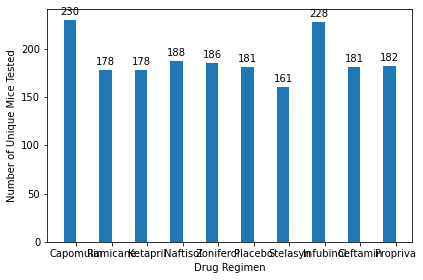

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol','Placebo','Stelasyn', 'Infubinol','Ceftamin','Propriva']
tot_measures = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
#women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tot_measures, width, label='Men')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Unique Mice Tested')
ax.set_xlabel("Drug Regimen")
ax.set_title('')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

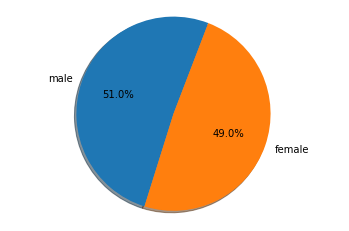

In [52]:
### Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'male', 'female'
sizes = [51, 49]

#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, #explode=explode, 
        labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=69)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [ ]:
# Other graphs to follow
# 